In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df_train= pd.read_csv('train-data.csv')
df_test = pd.read_csv('test-data.csv')

In [40]:
df_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [41]:
df_train['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [42]:
df_train = df_train[['Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','Price']]

In [43]:
df_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [44]:
df_train['Mileage'] = df_train['Mileage'].str.extract(r'(\d+.\d+)').astype('float')
df_train['Engine'] = df_train['Engine'].str.extract(r'(\d+.\d+)').astype('float')
df_train['Power'] = df_train['Power'].str.extract(r'(\d+.\d+)').astype('float')

In [45]:
df_train = df_train.dropna()

In [46]:
df_train.shape

(4914, 11)

In [47]:
df_train['c_Year']=2021
df_train['age_Year']= df_train['c_Year']-df_train['Year']
df_train.drop(['c_Year'], axis=1, inplace=True)
df_train.drop(['Year'], axis=1, inplace=True)
df_train.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,age_Year
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,6
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,9
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,8


In [48]:
df_train = df_train[['Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','age_Year','Price']]

In [49]:
new_df_train = pd.get_dummies(df_train,drop_first = True)

In [50]:
new_df_train.corr()

,Kilometers_Driven,Mileage,Engine,Power,Seats,age_Year,Price,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
Kilometers_Driven,1.000000,-0.064509,0.095785,0.040888,0.087321,0.158103,-0.001438,0.096674,0.000974,-0.096815,0.016456,0.031393,0.049917,0.037097
Mileage,-0.064509,1.000000,-0.681350,-0.571205,-0.342760,-0.264288,-0.360122,0.004789,0.015038,-0.047158,0.387403,-0.042385,-0.111374,-0.075429
Engine,0.095785,-0.681350,1.000000,0.863486,0.385882,0.107378,0.645218,0.459872,-0.048481,-0.436676,-0.494211,0.030722,0.060091,0.044230
Power,0.040888,-0.571205,0.863486,1.000000,0.071674,0.038688,0.761541,0.325864,-0.049553,-0.301623,-0.639962,0.003450,0.046773,0.032046
Seats,0.087321,-0.342760,0.385882,0.071674,1.000000,0.009230,0.030921,0.342790,-0.017304,-0.335329,0.105829,0.048218,0.004471,0.010153
age_Year,0.158103,-0.264288,0.107378,0.038688,0.009230,1.000000,-0.296712,-0.084666,0.043497,0.082345,0.054120,0.066590,0.287391,0.187458
Price,-0.001438,-0.360122,0.645218,0.761541,0.030921,-0.296712,1.000000,0.345023,-0.031171,-0.330845,-0.578120,-0.015132,-0.062819,-0.039434
Fuel_Type_Diesel,0.096674,0.004789,0.459872,0.325864,0.342790,-0.084666,0.345023,1.000000,-0.049298,-0.976037,-0.176230,0.011819,-0.010102,-0.029467
Fuel_Type_LPG,0.000974,0.015038,-0.048481,-0.049553,-0.017304,0.043497,-0.031171,-0.049298,1.000000,-0.040373,0.031931,-0.001289,0.005891,-0.005468
Fuel_Type_Petrol,-0.096815,-0.047158,-0.436676,-0.301623,-0.335329,0.082345,-0.330845,-0.976037,-0.040373,1.000000,0.159569,-0.011158,0.007884,0.032464


In [51]:
%matplotlib inline

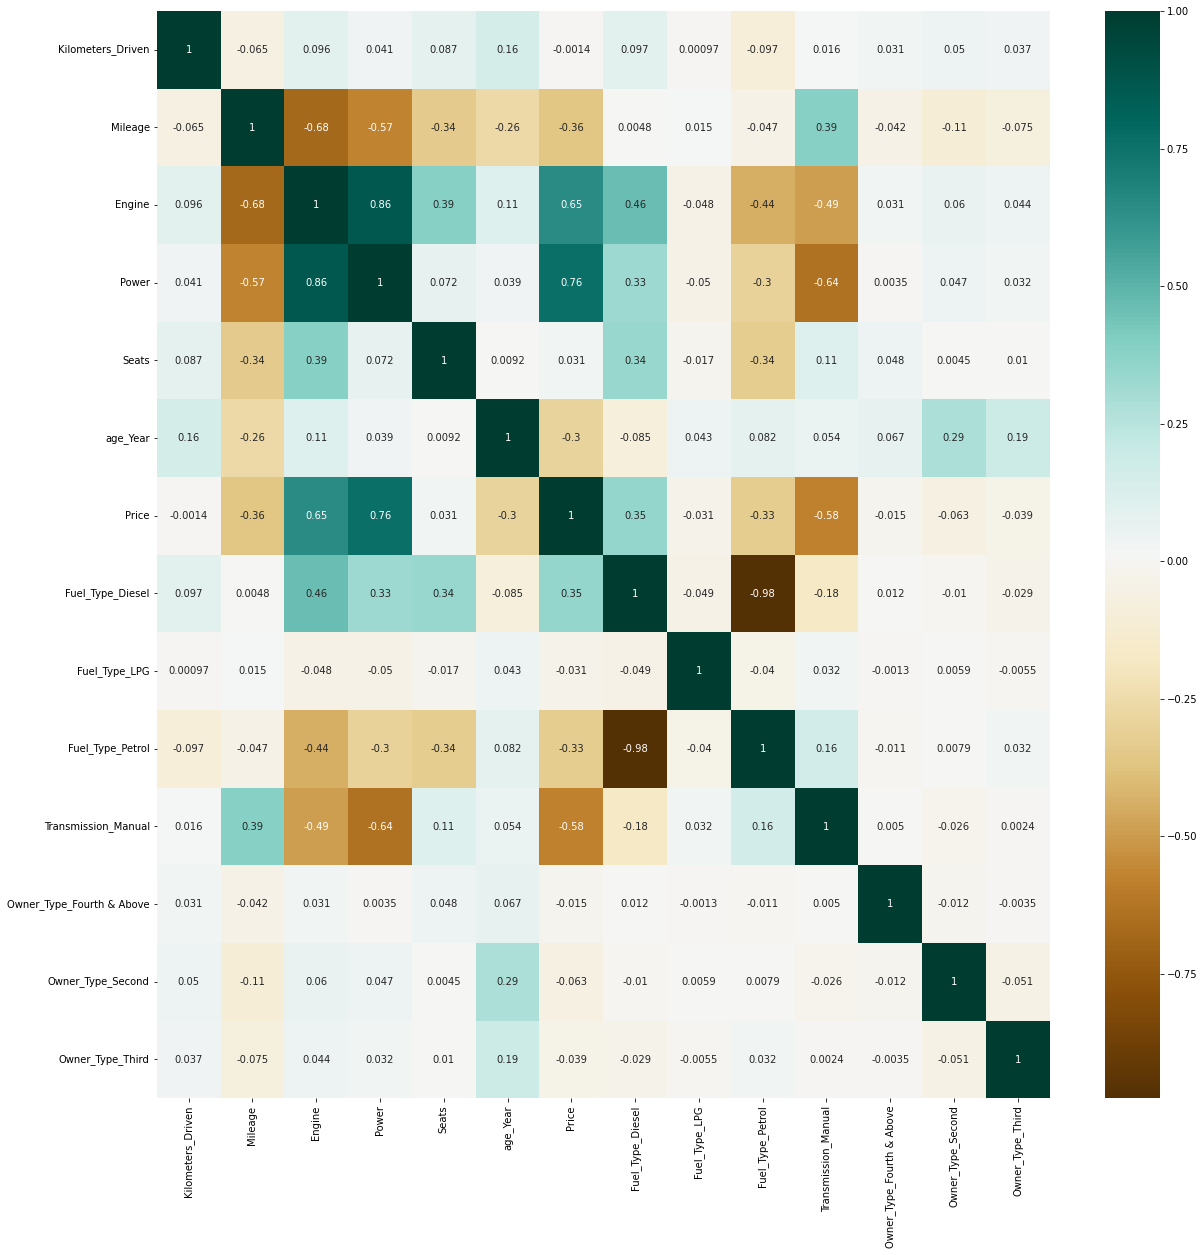

In [52]:
corrmat=new_df_train.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(new_df_train[top_corr_features].corr(),annot=True,cmap="BrBG")

In [53]:
new_df_train = new_df_train[['Price','Kilometers_Driven', 'Mileage', 'Power', 'Seats', 'age_Year', 'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third']]
#Engine and Power are highly correlated features, hence dropping Engine feature.

In [54]:
#independent and dependent features
X=new_df_train.iloc[:,1:]
Y=new_df_train.iloc[:,0]

In [55]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [56]:
print(model.feature_importances_)

[4.46793451e-02 4.75214291e-02 3.37146802e-01 4.92325259e-02
 1.59818059e-01 6.65785853e-02 9.75915347e-07 4.28552607e-03
 2.82257722e-01 1.01166791e-05 5.93449210e-03 2.53442092e-03]


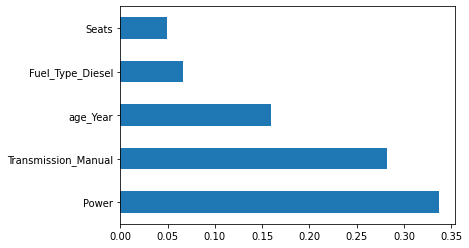

In [57]:
feat_importnaces = pd.Series(model.feature_importances_,index=X.columns)
feat_importnaces.nlargest(5).plot(kind='barh')
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [60]:
##Hyper parameters
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [27]:
#randomized search CV
#no. of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#no. of features to consider at every split
max_features = ['auto','sqrt']
#max no. of levels in tree
max_depth = [int(X) for X in np.linspace (5,30, num=6)]
#max_depth.append(None)
#min no. of samples required to split a node
min_sample_split = [2,5,10,15,100]
#no of samplesrequired at each leaf node
min_samples_leaf = [1,2,5,10]

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
#create random grid
random_grid = {'n_estimators': n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

#use the random grid search for best hyperparameters
#first create the base model to tune
rf=RandomForestRegressor()


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\lalit sharma\anaconda3\envs\Carprediction\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


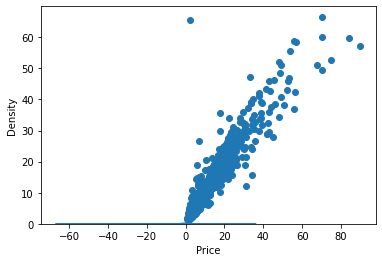

In [63]:
rf_random = RandomizedSearchCV(estimator= rf, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

rf_random.fit(X_train,Y_train)

predictions=rf_random.predict(X_test)

predictions

sns.distplot(Y_test-predictions)

plt.scatter(Y_test,predictions)

In [66]:
import pickle
#open a file, where you want to store the data
file = open('random_forest_regression_model_with_power.pkl','wb')

#dump information to that file
pickle.dump(rf_random,file)